# Tema 3 Fundamentos de estimación

### Rebeca Goya Esteban y Óscar Barquero Pérez

update:  de  de 2019

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />Este obra está bajo una <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">licencia de Creative Commons Reconocimiento-NoComercial-CompartirIgual 4.0 Internacional</a>. 

## Ejercicios práctica 3

En este ejercicio se quiere estimar el valor del $prostate$ $specific$ $antigen$, que denotamos matemáticamente por x, y que se ha identificado como un claro indicador de cáncer de próstata. Esta estimación se realizará en función de 8 variables conocidas (disponibles):

- lcavol (log cancer volume),
- lweight (log prostate weight lweight),
- age,
- lbph (log of benign prostatic hyperplasia amount),
- svi (seminal vesicle invasion),
- lcp (log of capsular penetration),
- gleason (Gleason score),
- pgg45 (percent of Gleason scores 4 or 5).

Todas las variables son números reales continuos excepto $svi$ (que es una variable booleana 0/1) y $gleason$ (que es un número entero entre 1 y 5). Una descripción más detallada de estos datos puede encontrarse en el ejemplo 2 del capítulo 1 del libro (disponible on-line) T.Hastie, R.Tibshirani, J.Friedman, ["The Elements of Statistical Learning: Data Mining, Inference, and Prediction"](https://web.stanford.edu/~hastie/ElemStatLearn//printings/ESLII_print10.pdf), 2nd Ed., Springer.

&nbsp;
Para realizar la predicción se realizará un ajuste lineal por Mínimos Cuadrados (LS), de acuerdo al siguiente
modelo

&nbsp;
\begin{aligned} x &=\theta_{1} \cdot 1 \mathrm{cavol}+\theta_{2} \cdot 1 \mathrm{weight}+\theta_{3} \cdot \mathrm{age}+\theta_{4} \cdot 1 \mathrm{bph}+\\ &+\theta_{5} \cdot \mathrm{svi}+\theta_{6} \cdot 1 \mathrm{cp}+\theta_{7} \cdot \mathrm{gleason}+\theta_{8} \cdot \mathrm{pgg} 45 \end{aligned}

Así, si disponemos de $i = 1;...;N$ observaciones, la relación entre los valores de x y de las 8 variables
(predictores) se puede escribir de forma matricial:

\begin{equation}
\left [ \begin{array}{c}
x[1] \\
x[2] \\
\vdots\\ 
x[N]
\end{array}
\right ] = \left [ \begin{array}{cccc}
lcavol[1] & lweight[1] & \cdots & pgg45[1] \\
lcavol[2] & lweight[2] & \cdots & pgg45[2] \\
\vdots & \vdots & \cdots & \vdots \\
lcavol[N] & lweight[N] & \cdots & pgg45[N]
\end{array}
\right ] \left [ \begin{array}{c}
\theta[1] \\
\theta[2] \\
\vdots\\ 
\theta[8]
\end{array}
\right ]
\end{equation}

o forma compacta

\begin{equation}
x = \textbf{$H·\theta$}
\end{equation}

donde
- x representa el valor estimado del antígeno.
- $\textbf{H}$ es una matriz de vector de tamaño Nx8, que contiene N ejemplos (filas), cada uno de los cuales representan los valores de las 8 variables predictores para el individuo para el que se quiere estimar.
- $\textbf{$\theta$}$ es un vector de tamaño 8 x 1 que contiene el peso relativo que se da a cada una variables predictoras.

Para llevar a cabo esta práctica se dispone de N = 97 observaciones que se dividirán en dos grupos: el conjunto de entrenamiento (formado por $N_{train} = 67$ observaciones) y el conjunto de test (formado por las $N_{test} = 30$ observaciones restantes). Las observaciones del conjunto de entrenamiento las utilizará para calcular (estimar) el valor de los coeficientes $\hat{\theta}$, mientras que las observaciones del conjunto de validación las utilizará para calcular (evaluar) la calidad del ajuste a través del error cuadrático medio.

## Ejercicio 1.
Cargue el archivo de datos: $io.loadmat(’prostate\_data.mat’);$. Dicho archivo contiene cuatro variables: $xtrain$, $xtest$, $Htrain$, $Htest$, que representan los valores del antígeno y de la matriz de observaciones para los conjuntos de entrenamiento y test respectivamente. Represente el histograma de cada variable (columna de $Htrain$) en una misma figura. Utilice el comando $plt.subplot(2,4,i)$, que dividirá una figura en 8 paneles (2 filas y 4 columnas), donde $i$ hace referencia al panel correspondiente. El siguiente código representa en el panel 1, la variable $lcavol$ de los datos de entrenamiento.
\begin{equation}
figure(1); subplot(2,4,1); hist(Htrain(:,1))
\end{equation}

Como puede comprobar, cada variable varía en un rango de valores muy heterogéneo. Por ejemplo, $age$ varía en el rango (40, 80), mientras que $lcavol$ varía entre (-1, 4). Para evitar que las variables con valores muy grandes afecten en mayor medida a la solución, es necesario normalizar los datos. Para ello, construya la función
\begin{equation}
Htrain\_norm,Htest\_norm = normdatos(Htrain,Htest)
\end{equation}

que reste a cada variable (columna de $Htrain$) su media (mean) y sea dividida entre su desviación típica (std). Posteriormente, la matriz $Htest$ ha de ser normalizada igualmente, utilizando la media y la desviación típica obtenida con los datos de train ($Htrain$). La función ha de devolver como salida las matrices de entrenamiento y test normalizadas. Hint: Utilice un bucle for para tratar por separado cada variable (cada columna de $Htrain$).
Represente ahora el histograma de cada variable normalizada (columna de $Htrain\_norm$).

dict_keys(['__header__', '__version__', '__globals__', 'Htrain', 'Htest', 'xtrain', 'xtest'])


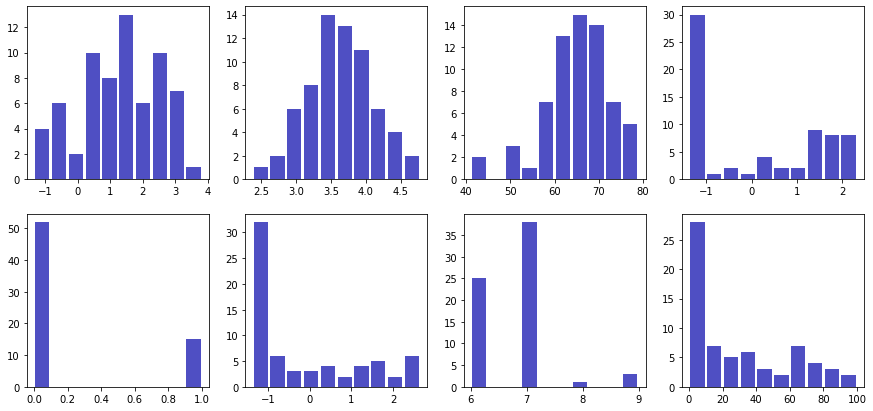

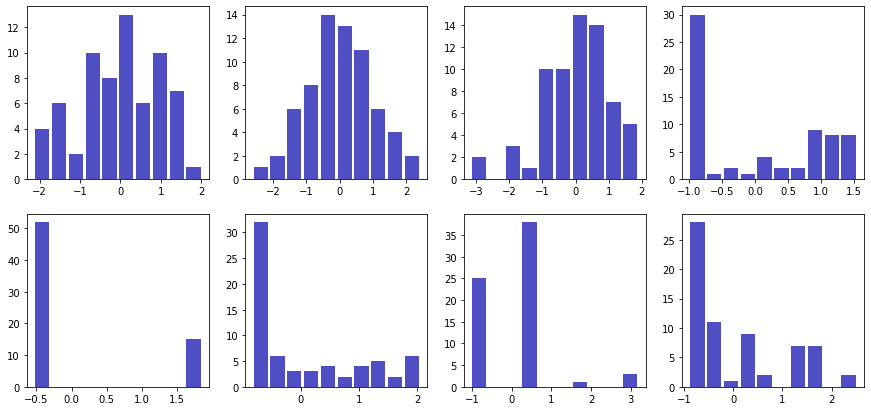

In [3]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from scipy import io  # Para cargar archivos .mat
import statistics

dat = io.loadmat('prostate_data.mat')
keys = dat.keys()
print(keys)
# Extraemos las variables con las que queremos trabajar
Htrain = dat['Htrain']
Htest = dat['Htest']
xtrain = dat['xtrain']
xtest = dat['xtest']
np.save('xtrain', xtrain)
np.save('xtest', xtest)

i = 1  # indice de subplots
plt.figure(figsize=(15, 7))
for num in range(Htrain.shape[1]):
    plt.subplot(2, 4, i)
    plt.hist(Htrain[:, num], bins=10, color='#0504aa',
             alpha=0.7, rwidth=0.85)
    i = i + 1

plt.show()


# Función normalizado de datos
def normdatos(Htrain, Htest):
    nt, nfeat = Htrain.shape
    Hntrain = np.zeros(np.shape(Htrain))
    Hntest = np.zeros(np.shape(Htest))
    for num in range(Htrain.shape[1]):
        mu = statistics.mean(Htrain[:, num])
        sigma = statistics.stdev(Htrain[:, num])
        Hntrain[:, num] = (Htrain[:,num]-mu) / sigma
        Hntest[:, num] = (Htest[:,num]-mu) / sigma

    return Hntrain, Hntest


# Llamada a normalizado de datos
Htrain_norm, Htest_norm = normdatos(Htrain, Htest)

np.save('Htrain_norm', Htrain_norm)
np.save('Htest_norm', Htest_norm)

# Plotting datos normalizados
plt.figure(figsize=(15, 7))
i = 1  # indice de subplots
for num in range(Htrain_norm.shape[1]):
    plt.subplot(2, 4, i)
    plt.hist(Htrain_norm[:, num], bins=10, color='#0504aa',
             alpha=0.7, rwidth=0.85)

    i = i + 1

plt.show()

## Ejercicio 2.
Para una correcta predicción es necesario añadir un término constante $\theta_0$ llamado $intercept$, tal que:

\begin{equation}
\begin{aligned} x &=\theta_{0} + \theta_{1} \cdot 1 \mathrm{cavol}+\theta_{2} \cdot 1 \mathrm{weight}+\theta_{3} \cdot \mathrm{age}+\theta_{4} \cdot 1 \mathrm{bph}+\\ &+\theta_{5} \cdot \mathrm{svi}+\theta_{6} \cdot 1 \mathrm{cp}+\theta_{7} \cdot \mathrm{gleason}+\theta_{8} \cdot \mathrm{pgg} 45 \end{aligned}
\end{equation}

Este término hay que añadirlo para cada muestra de entrenamiento y test,

\begin{equation}
\left [ \begin{array}{c}
x[1] \\
x[2] \\
\vdots\\ 
x[N]
\end{array}
\right ] = \left [ \begin{array}{cccc}
1 & lcavol[1] & lweight[1] & \cdots & pgg45[1] \\
1 & lcavol[2] & lweight[2] & \cdots & pgg45[2] \\
1 & \vdots & \vdots & \cdots & \vdots \\
1 & lcavol[N] & lweight[N] & \cdots & pgg45[N]
\end{array}
\right ] \left [ \begin{array}{c}
\theta[0] \\
\theta[1] \\
\theta[2] \\
\vdots\\ 
\theta[8]
\end{array}
\right ]
\end{equation}

lo que de forma efectiva se traduce en añadir un vector columna de 1s en la matriz de observaciones H:

\begin{equation}
x = [1;H] · \theta
\end{equation}

Construya las variables $Htrain\_norm\_ext$ y $Htest\_norm\_ext$ añadiendo un vector columna de 1s sobre la matrices $Htrain\_norm$ y $Htest\_norm$ normalizadas obtenidas en el apartado anterior.

In [21]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

Hntrain = np.load('Htrain_norm.npy')
Hntest = np.load('Htest_norm.npy')

#Concateno matrices para añadir columna de 1s a la vez a train y test
Hn = np.concatenate((Hntrain,Hntest),axis=0)
Hext = np.concatenate((np.ones((97,1)),Hn),axis=1)

Htrain_norm_ext = Hext[0:67,:]
Htest_norm_ext = Hext[67:,:]

np.save('Htrain_norm_ext', Htrain_norm_ext)
np.save('Htest_norm_ext', Htest_norm_ext)



## Ejercicio 3.
Utilice los datos de entrenamiento $Htrain\_norm\_ext$ para estimar los coeficientes $\hat{\theta}$. Para ello, recuerde que 

\begin{equation}
\hat{\theta} = H^\dagger_{train} x_{train}
\end{equation}

donde $H^\dagger_{train}$ representa la pseudo-inversa (comando $linalg.pinv$) de la matriz de entrenamiento normalizada y extendida ($Htrain\_norm\_ext$), y $x_{train}$ es el valor antígeno para las muestras de entrenamiento ($xtrain$).

In [22]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

xtrain = np.load('xtrain.npy')
Htrain_norm_ext = np.load('Htrain_norm_ext.npy')

#Coeficientes theta
theta = np.dot(np.linalg.pinv(Htrain_norm_ext), xtrain) #np.dot para hacer operación matricial (* da error por dimensiones)

np.save('theta', theta)

## Ejercicio 4.
Una vez calculados los pesos $\hat{\theta}$, podemos evaluar la bondad del ajuste. Para ello,
1. Obtenga el valor del antígeno que se obtendría con el vector de pesos estimado en el apartado anterior $\hat{\theta}$

\begin{equation}
\hat{x_{test}} = H_{test}\hat{\theta}
\end{equation}

donde $H_{test} = Htest\_norm\_ext$.

2. Represente, en una misma figura, los valores estimados $\hat{x_{test}}$ y los valores reales $x_{test}$. Utilice puntos azules para $x_{test}$ y cruces rojas para $\hat{x_{test}}$.

3. Calcule el error cuadrático medio medido sobre los datos de test.


0.5212740055076001


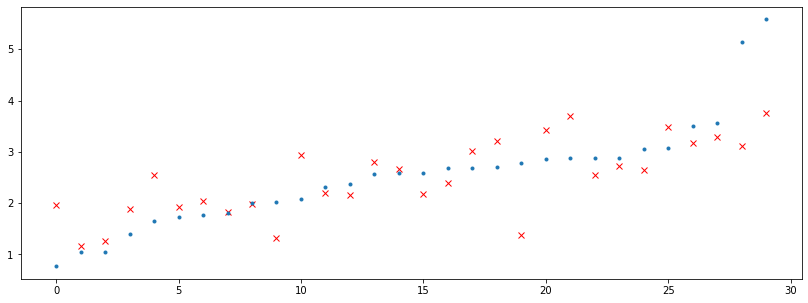

In [24]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import statistics

Htest_norm_ext = np.load('Htest_norm_ext.npy')
xtest = np.load('xtest.npy')
theta = np.load('theta.npy')

#Valor antígeno
xest  = np.dot(Htest_norm_ext,theta)
error = np.linalg.norm(xtest-xest)

#Error cuadrático medio
mse_1 = ((xest-xtest)**2).mean()
print(mse_1)

#Plotting valores estimados vs valores reales
fig = plt.figure(figsize=(14,5))
ax = fig.subplots()
ax.plot(xest,'rx')
ax.plot(xtest,'.')
plt.show()

## Ejercicio 5.
La magnitud de los pesos $\hat{\theta}$ asociados a cada variable puede entenderse como la importancia de la misma, de tal forma que valores muy pequeños de $\theta_i$ indican que la variable $i$ es poco significativa. Evalúe la magnitud de los pesos y elimine las columnas de $Htrain\_norm\_ext$ y $Htest\_norm\_ext$ asociadas a las variables poco significativas. Repita el ejercicio anterior con las nuevas matrices de observaciones calculadas y reflexione sobre los resultados obtenidos.

In [29]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import statistics

xtrain = np.load('xtrain.npy')
Htrain_norm_ext = np.load('Htrain_norm_ext.npy')
Htest_norm_ext = np.load('Htest_norm_ext.npy')
xtest = np.load('xtest.npy')
theta = np.load('theta.npy')

print(theta)

[[ 2.45234509]
 [ 0.71640701]
 [ 0.2926424 ]
 [-0.14254963]
 [ 0.2120076 ]
 [ 0.30961953]
 [-0.28900562]
 [-0.02091352]
 [ 0.27734595]]


[[ 2.45234509]
 [ 0.71640701]
 [ 0.2926424 ]
 [-0.14254963]
 [ 0.2120076 ]
 [ 0.30961953]
 [-0.28900562]
 [-0.02091352]
 [ 0.27734595]]
0.398534021880662


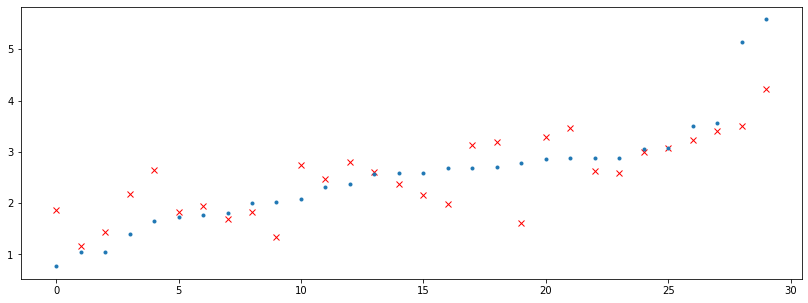

In [33]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import statistics

xtrain = np.load('xtrain.npy')
Htrain_norm_ext = np.load('Htrain_norm_ext.npy')
Htest_norm_ext = np.load('Htest_norm_ext.npy')
xtest = np.load('xtest.npy')
theta = np.load('theta.npy')

print(theta)
#Quito características 3, 4, 6 y 8
Htrain_2 = Htrain_norm_ext.take([0,1,2,5,7],axis=1)
Htest_2 = Htest_norm_ext.take([0,1,2,5,7],axis=1)

#Cálculo nuevo theta
theta_2 = np.dot(np.linalg.pinv(Htrain_2), xtrain)

#Valor nuevo antígeno
xest  = np.dot(Htest_2, theta_2)
error = np.linalg.norm(xtest-xest)

#Error cuadrático medio
mse_2 = ((xest-xtest)**2).mean()
print(mse_2)

#Plotting valores estimados vs valores reales
fig = plt.figure(figsize=(14,5))
ax = fig.subplots()
ax.plot(xest,'rx')
ax.plot(xtest,'.')
plt.show()



[[ 2.45234509]
 [ 0.71640701]
 [ 0.2926424 ]
 [-0.14254963]
 [ 0.2120076 ]
 [ 0.30961953]
 [-0.28900562]
 [-0.02091352]
 [ 0.27734595]]
0.398534021880662


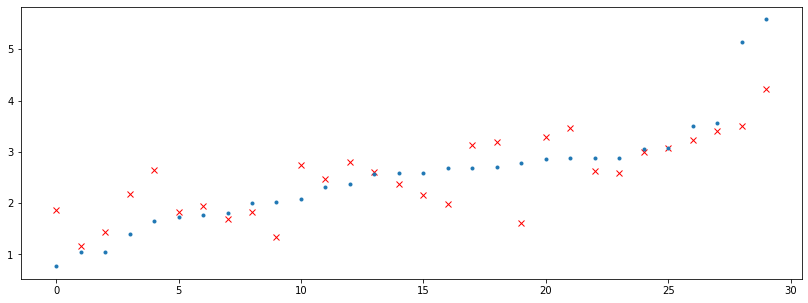

0.48592421071397884


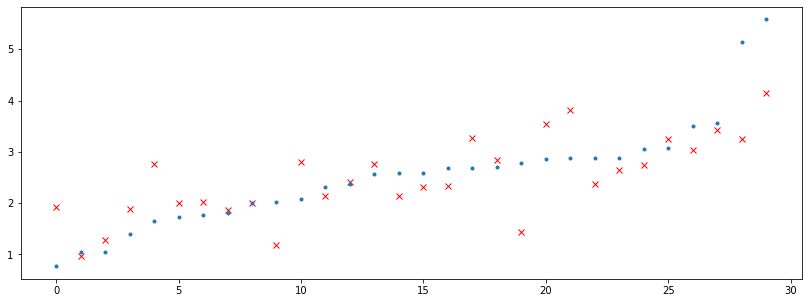

In [36]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import statistics

xtrain = np.load('xtrain.npy')
Htrain_norm_ext = np.load('Htrain_norm_ext.npy')
Htest_norm_ext = np.load('Htest_norm_ext.npy')
xtest = np.load('xtest.npy')
theta = np.load('theta.npy')

print(theta)
#Quito características 3, 4, 6 y 8
Htrain_2 = Htrain_norm_ext.take([0,1,2,5,7],axis=1)
Htest_2 = Htest_norm_ext.take([0,1,2,5,7],axis=1)

#Cálculo nuevo theta
theta_2 = np.dot(np.linalg.pinv(Htrain_2), xtrain)

#Valor nuevo antígeno
xest  = np.dot(Htest_2, theta_2)
error = np.linalg.norm(xtest-xest)

#Error cuadrático medio
mse_2 = ((xest-xtest)**2).mean()
print(mse_2)

#Plotting valores estimados vs valores reales
fig = plt.figure(figsize=(14,5))
ax = fig.subplots()
ax.plot(xest,'rx')
ax.plot(xtest,'.')
plt.show()
#--------------------------------------------------------------#
#Quito característica 3, 6 y 7
Htrain_3 = Htrain_norm_ext.take([0,1,2,4,5,8],axis=1)
Htest_3 = Htest_norm_ext.take([0,1,2,4,5,8],axis=1)

#Cálculo nuevo theta
theta_3 = np.dot(np.linalg.pinv(Htrain_3), xtrain)

#Valor nuevo antígeno
xest  = np.dot(Htest_3, theta_3)
error = np.linalg.norm(xtest-xest)

#Error cuadrático medio
mse_3 = ((xest-xtest)**2).mean()
print(mse_3)

#Plotting valores estimados vs valores reales
fig = plt.figure(figsize=(14,5))
ax = fig.subplots()
ax.plot(xest, 'rx')
ax.plot(xtest, '.')
plt.show()
